### Importing data and modules

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
movie_reviews = pd.read_csv("fandango_score_comparison.csv")

### Plotting distribution

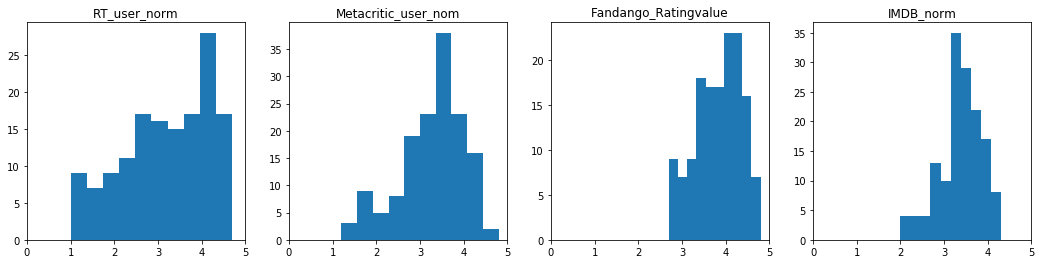

In [21]:
cols =["RT_user_norm", "Metacritic_user_nom", "Fandango_Ratingvalue", "IMDB_norm"]

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 4))
for i, ax in enumerate(axes):
    ax.set_xlim(0, 5)
    ax.hist(movie_reviews[cols[i]]) # plots without a grid
    #movie_reviews[cols[i]].hist(ax=ax) # plost with a grid
    ax.set_title(cols[i])
    
plt.show()

### Descriptive statistics

In [23]:
# mean

rt_mean = movie_reviews['RT_user_norm'].mean()
mc_mean = movie_reviews['Metacritic_user_nom'].mean()
fg_mean = movie_reviews['Fandango_Ratingvalue'].mean()
id_mean = movie_reviews['IMDB_norm'].mean()
print(rt_mean, mc_mean, fg_mean, id_mean, sep = '\n')


3.19383561644
3.2595890411
3.84520547945
3.36849315068


In [85]:
# variance and std-dev

cols =["RT_user_norm", "Metacritic_user_nom", "Fandango_Ratingvalue", "IMDB_norm"]

def var_stddev(series):
    return (np.var(series), np.std(series))

all_stat = movie_reviews[cols].apply(var_stddev)

rt_var, rt_stdev = all_stat[0]
mc_var, mc_stdev = all_stat[1]
fg_var, fg_stdev = all_stat[2]
id_var, id_stdev = all_stat[3]

for i, c in enumerate(cols):
    print('The var of {} is {} and the stdev is {}.'
          .format(cols[i],
                  round(all_stat.iloc[i][0], 3),
                  round(all_stat.iloc[i][1], 3)))

The var of RT_user_norm is 0.996 and the stdev is 0.998.
The var of Metacritic_user_nom is 0.567 and the stdev is 0.753.
The var of Fandango_Ratingvalue is 0.251 and the stdev is 0.501.
The var of IMDB_norm is 0.228 and the stdev is 0.478.


A weird thing - numpy and pandas calculate \[var, std\] differently. 
https://stackoverflow.com/questions/24984178/different-std-in-pandas-vs-numpy

In [86]:
np.var(movie_reviews[cols[0]])

0.99557843873146923

In [87]:
movie_reviews[cols[0]].var()

1.0024444969296173

### Plotting correlation

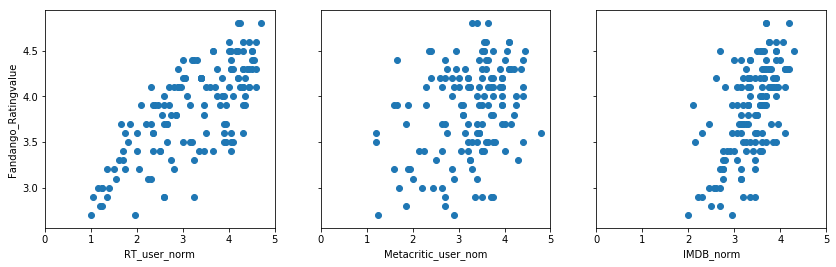

In [145]:
cols =["Fandango_Ratingvalue", "RT_user_norm", "Metacritic_user_nom", "IMDB_norm"]

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(14, 4))
axes[0].set_ylabel(cols[0])
for i, ax in enumerate(axes):
    ax.set_xlim(0.0, 5.0)
    ax.scatter(movie_reviews[cols[i+1]],
              movie_reviews[cols[0]])
    ax.set_xlabel(cols[i+1])

        
plt.show()

### Calculating covariance & correlation

In [119]:
# covariance
cols =["Fandango_Ratingvalue", "RT_user_norm", "Metacritic_user_nom", "IMDB_norm"]

covariance = np.cov(movie_reviews[cols], 
                    rowvar=False,
                   bias=True) # in order to divide by N (not N-1)

rt_fg_covar = covariance[0,1]
mc_fg_covar = covariance[0,2]
id_fg_covar = covariance[0,3]

for i in range(3):
    print('Covariance between {} and {} is {}'.
         format(cols[0], cols[i+1], covariance[0, i+1].round(2)))

Covariance between Fandango_Ratingvalue and RT_user_norm is 0.36
Covariance between Fandango_Ratingvalue and Metacritic_user_nom is 0.13
Covariance between Fandango_Ratingvalue and IMDB_norm is 0.14


In [136]:
# correlation

cols =["Fandango_Ratingvalue", "RT_user_norm", "Metacritic_user_nom", "IMDB_norm"]

correlation = np.corrcoef(movie_reviews[cols],
                          rowvar=False)

for i in range(3):
    print('Correlation between {} and {} is {}'.
         format(cols[0], cols[i+1], correlation[0, i+1].round(2)))

Correlation between Fandango_Ratingvalue and RT_user_norm is 0.72
Correlation between Fandango_Ratingvalue and Metacritic_user_nom is 0.34
Correlation between Fandango_Ratingvalue and IMDB_norm is 0.6


In [126]:
# a funny manual way without numpy 

def calc_mean(series):
    vals = series.values
    mean = sum(vals) / len(vals)
    return mean

def calc_variance(series):
    mean = calc_mean(series)
    squared_deviations = (series - mean)**2
    mean_squared_deviations = calc_mean(squared_deviations)
    return mean_squared_deviations

def calc_covariance(series_one, series_two):
    x_mean = calc_mean(series_one)
    y_mean = calc_mean(series_two)
    x_diffs = series_one - x_mean
    y_diffs = series_two - y_mean
    codeviates = x_diffs * y_diffs
    return sum(codeviates) / len(codeviates)

rt_fg_covar = calc_covariance(movie_reviews["RT_user_norm"],
                              movie_reviews["Fandango_Ratingvalue"])

mc_fg_covar = calc_covariance(movie_reviews["Metacritic_user_nom"], 
                              movie_reviews["Fandango_Ratingvalue"])

id_fg_covar = calc_covariance(movie_reviews["IMDB_norm"], 
                              movie_reviews["Fandango_Ratingvalue"])

rt_fg_corr = rt_fg_covar / (calc_variance(movie_reviews["RT_user_norm"])*
                            calc_variance(movie_reviews["Fandango_Ratingvalue"]))**(1/2)

mc_fg_corr = mc_fg_covar / (calc_variance(movie_reviews["Metacritic_user_nom"])*
                            calc_variance(movie_reviews["Fandango_Ratingvalue"]))**(1/2)

id_fg_corr = id_fg_covar / (calc_variance(movie_reviews["IMDB_norm"])*
                            calc_variance(movie_reviews["Fandango_Ratingvalue"]))**(1/2)
